<a href="https://colab.research.google.com/github/hamzajb95/CE888/blob/main/Lab2/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(df)
print(type(data))
sample = np.random.choice(data,size=(5,10))
print(sample)
print(sample[1])

    Day   Millons of pounds in sales
0     1                          2.0
1     2                          8.0
2     3                         20.0
3     4                         13.0
4     5                          5.0
5     6                          9.0
6     7                         10.0
7     8                          8.0
8     9                         22.0
9    10                         10.0
10   11                          2.0
11   12                          4.0
12   13                          7.0
13   14                          9.0
<class 'numpy.ndarray'>
[[ 4.  7.  9.  9. 13. 10. 13. 13.  5.  9.]
 [22. 22.  4.  7. 22. 10.  2. 10. 22. 22.]
 [ 7.  2.  7. 22. 20.  9.  5. 10.  9.  7.]
 [ 8.  8. 13. 10.  5.  4.  2. 13.  2. 10.]
 [ 9. 13.  4. 22. 13. 10.  9.  8.  2.  7.]]
[22. 22.  4.  7. 22. 10.  2. 10. 22. 22.]


In [4]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  data = np.random.choice(x,(n_bootstraps,sample_size))
  data_mean = np.mean(data)
  bootMean = data.mean(axis=1)
  lower = np.percentile(bootMean,2.5)
  upper = np.percentile(bootMean,97.5)

  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

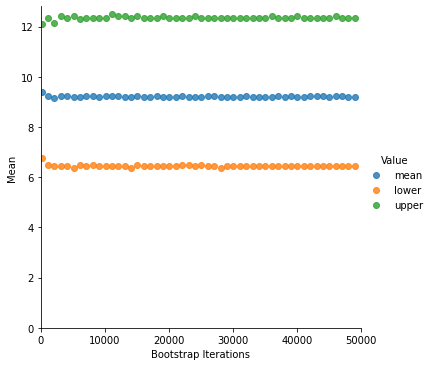

In [5]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [6]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  data = np.random.choice(sample,(n_bootstraps,sample_size))
  data_mean = np.mean(data)
  bootMean = data.mean(axis=1)
  ciLow = (100-ci)/2
  ciUp = ci+ciLow
  lower = np.percentile(bootMean,ciLow)
  upper = np.percentile(bootMean,ciUp)
  return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

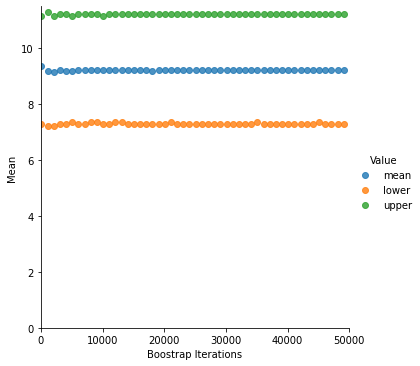

In [7]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


     Current fleet  New Fleet
0               18       24.0
1               15       27.0
2               18       27.0
3               16       25.0
4               17       31.0
..             ...        ...
244             27        NaN
245             27        NaN
246             32        NaN
247             28        NaN
248             31        NaN

[249 rows x 2 columns]


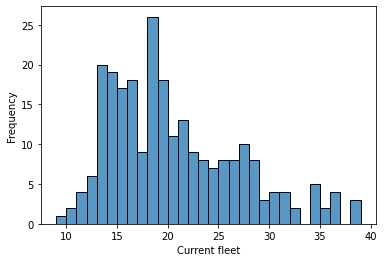

In [8]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
dfVeh = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
print(dfVeh)

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
curfleetHist = sns.histplot(data=dfVeh, x='Current fleet', bins=30, stat='frequency')
curfleetHist

# Note: you can add more cells as needed to organise your code and your plots


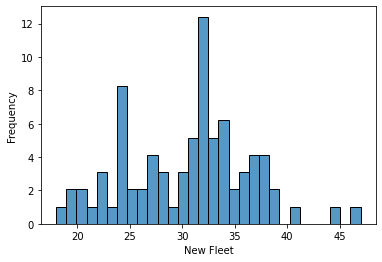

In [10]:
newfleetHist = sns.histplot(data=dfVeh, x='New Fleet', bins=30, stat='frequency')
newfleetHist

In [11]:
#I dont understand how you want me to make a scatterplot for Single variable. It is incomprehensive for me.

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [12]:

meanCf = np.mean(dfVeh['Current fleet'])
meanCf
meanNf = np.mean(dfVeh['New Fleet'])
print("Current Fleet -->",meanNf,"   New Fleet -->" ,meanCf)



Current Fleet --> 30.481012658227847    New Fleet --> 20.14457831325301


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

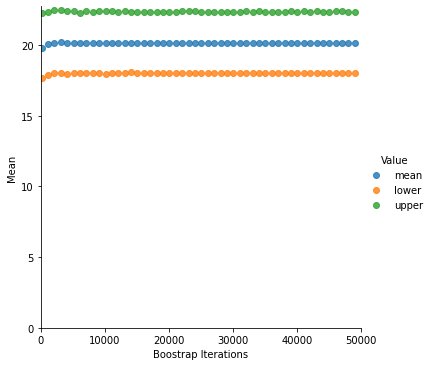

In [13]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(dfVeh['Current fleet'], data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

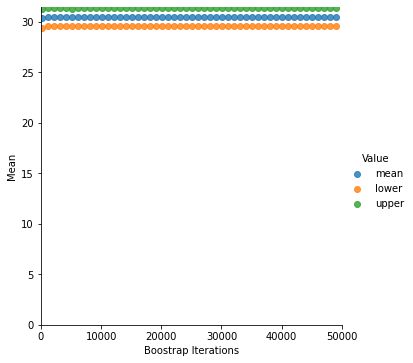

In [14]:
d = dfVeh['New Fleet'].dropna()
d
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(d, len(d), i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

In [35]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    meanOldF = np.mean(sample1)
    meanNewF = np.mean(sample2)
    tObs = meanNewF - meanOldF

    concat = np.concatenate((sample1, sample2))
    count = 0
    for i in range(n_permutations):
      perm = np.random.permutation(concat)
      split1 = perm[:int(len(perm/2))]
      split2 = perm[int(len(perm/2)):]
      tperm = np.mean(split1) - np.mean(split2)
      count = count+1
    
    pvalue=count/n_permutations
    print(count)
    return pvalue



In [36]:
d = dfVeh['New Fleet'].dropna()
permu = permut_test(dfVeh['Current fleet'],dfVeh['New Fleet'], 30000)
print(permu)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


30000
1.0


In [22]:
#95% CI for new fleet vehicles set
d = dfVeh['New Fleet'].dropna()
boot = bootstrap_mean_ci(d, len(d), 10000, 95)
print(boot[1], "lower")
print(boot[2], "upper")

29.088607594936708 lower
31.835443037974684 upper


In [23]:
#95% CI for customers set
boot = bootstrap_mean(data, data.shape[0], 10000)
print(boot[1], "lower")
print(boot[2], "upper")

6.428571428571429 lower
12.285714285714286 upper


In [24]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  data = np.random.choice(sample,(n_bootstraps,sample_size))
  data_std = np.std(data)
  bootStd = data.std(axis=1)
  ciLow = (100-ci)/2
  ciUp = ci+ciLow
  lower = np.percentile(bootStd,ciLow)
  upper = np.percentile(bootStd,ciUp)
  return data_std, lower, upper

#85% customer dataset
boot = bootstrap_std_ci(d, data.shape[0], 10000, 85)
print(boot[1], "lower")
print(boot[2], "upper")


4.2287886044616245 lower
7.305723568727217 upper


In [27]:
d = dfVeh['New Fleet'].dropna()
boot = bootstrap_std_ci(d, len(d), 10000, 95)
print(boot[1], "lower")
print(boot[2], "upper")

5.139114234269159 lower
6.9040120278246935 upper
